In [744]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn import neighbors
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score

 **LOADING THE DATASET AND DESCRIBE IT.**

In [745]:
dataset= pd.read_csv("/content/train-chennai-sale.csv")

In [746]:
dataset.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [747]:
dataset=dataset.drop_duplicates()

In [748]:
dataset.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
count,7109.000000,7109.000000,7108.000000,7104.000000,7109.000000,7109.000000,7109.000000,7109.000000,7061.000000,7109.000000,7109.000000,7.109000e+03
mean,1382.073006,99.603179,1.637029,1.213260,3.688704,3.517471,3.507244,3.485300,3.503254,376938.330708,141005.726544,1.089491e+07
std,457.410902,57.403110,0.802902,0.409639,1.019099,0.891972,0.897834,0.887266,0.527223,143070.662010,78768.093718,3.768603e+06
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,71177.000000,5055.000000,2.156875e+06
25%,993.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,272406.000000,84219.000000,8.272100e+06
50%,1373.000000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.500000,349486.000000,127628.000000,1.033505e+07
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.890000,451562.000000,184506.000000,1.299390e+07
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,983922.000000,495405.000000,2.366734e+07


**FINDING NULL VALUES AND FIX IT.**

**NULL VALUES IN CATEGORICAL COLUMN MEANS CHANGE INTO MODE.**

**NULL VALUES IN CONTINUOUS COLUMN MEANS CHANGE INTO MEAN OR MEDIAN, HERE I GO WITH MEAN.**

In [749]:
dataset.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

In [750]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

In [751]:
dataset['N_BEDROOM'] = np.where(dataset['N_BEDROOM'].isnull(), dataset.N_BEDROOM.mode(), dataset['N_BEDROOM'])
dataset['N_BATHROOM'] = np.where(dataset['N_BATHROOM'].isnull(), dataset.N_BATHROOM.mode(), dataset['N_BATHROOM'])
dataset['QS_OVERALL'] = np.where(dataset['QS_OVERALL'].isnull(), dataset.QS_OVERALL.mean(), dataset['QS_OVERALL'])

In [752]:
dataset.isnull().sum()

PRT_ID           0
AREA             0
INT_SQFT         0
DATE_SALE        0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
DATE_BUILD       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
REG_FEE          0
COMMIS           0
SALES_PRICE      0
dtype: int64

**CHECKING DATATYPES**

In [753]:
dataset.dtypes

PRT_ID            object
AREA              object
INT_SQFT           int64
DATE_SALE         object
DIST_MAINROAD      int64
N_BEDROOM        float64
N_BATHROOM       float64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
DATE_BUILD        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
REG_FEE            int64
COMMIS             int64
SALES_PRICE        int64
dtype: object

**CHANGING TO PROPER DATATYPES**

In [754]:
dataset.DATE_SALE = dataset.DATE_SALE.astype('datetime64')
dataset.N_BEDROOM = dataset.N_BEDROOM.astype('int')
dataset.N_BATHROOM = dataset.N_BATHROOM.astype('int')
dataset.DATE_BUILD = dataset.DATE_BUILD.astype('datetime64')

In [755]:
dataset.dtypes

PRT_ID                   object
AREA                     object
INT_SQFT                  int64
DATE_SALE        datetime64[ns]
DIST_MAINROAD             int64
N_BEDROOM                 int64
N_BATHROOM                int64
N_ROOM                    int64
SALE_COND                object
PARK_FACIL               object
DATE_BUILD       datetime64[ns]
BUILDTYPE                object
UTILITY_AVAIL            object
STREET                   object
MZZONE                   object
QS_ROOMS                float64
QS_BATHROOM             float64
QS_BEDROOM              float64
QS_OVERALL              float64
REG_FEE                   int64
COMMIS                    int64
SALES_PRICE               int64
dtype: object

In [756]:
dataset.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
count,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7.109000e+03
mean,1382.073006,99.603179,1.636939,1.213110,3.688704,3.517471,3.507244,3.485300,3.503254,376938.330708,141005.726544,1.089491e+07
std,457.410902,57.403110,0.802881,0.409534,1.019099,0.891972,0.897834,0.887266,0.525440,143070.662010,78768.093718,3.768603e+06
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,71177.000000,5055.000000,2.156875e+06
25%,993.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,272406.000000,84219.000000,8.272100e+06
50%,1373.000000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.503254,349486.000000,127628.000000,1.033505e+07
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.880000,451562.000000,184506.000000,1.299390e+07
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,983922.000000,495405.000000,2.366734e+07


**DROPPING THE UNWANTED COLUMNS AND DUPLICATES**

In [757]:
dataset=dataset.drop(['PRT_ID','REG_FEE','COMMIS'],axis = 1)

In [758]:
dataset.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE
0,Karapakkam,1004,2011-04-05,131,1,1,3,AbNormal,Yes,1967-05-15,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000
1,Anna Nagar,1986,2006-12-19,26,2,1,5,AbNormal,No,1995-12-22,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770
2,Adyar,909,2012-04-02,70,1,1,3,AbNormal,Yes,1992-09-02,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200
3,Velachery,1855,2010-03-13,14,3,2,5,Family,No,1988-03-18,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,9630290
4,Karapakkam,1226,2009-05-10,84,1,1,3,AbNormal,Yes,1979-10-13,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250


In [759]:
dataset.columns

Index(['AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'SALES_PRICE'],
      dtype='object')

CREATING AGE COLUMN

In [760]:
dataset["AGE"]=pd.DatetimeIndex(dataset['DATE_SALE']).year - pd.DatetimeIndex(dataset['DATE_BUILD']).year

In [761]:
dataset.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,AGE
0,Karapakkam,1004,2011-04-05,131,1,1,3,AbNormal,Yes,1967-05-15,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000,44
1,Anna Nagar,1986,2006-12-19,26,2,1,5,AbNormal,No,1995-12-22,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770,11
2,Adyar,909,2012-04-02,70,1,1,3,AbNormal,Yes,1992-09-02,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200,20
3,Velachery,1855,2010-03-13,14,3,2,5,Family,No,1988-03-18,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,9630290,22
4,Karapakkam,1226,2009-05-10,84,1,1,3,AbNormal,Yes,1979-10-13,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250,30


**CHECKING THE OUTLIERS**
THERE ARE SOME OUTLIERS BUT NO NEED TO CORRECT THEM ACCORDING TO THIS DATASET.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


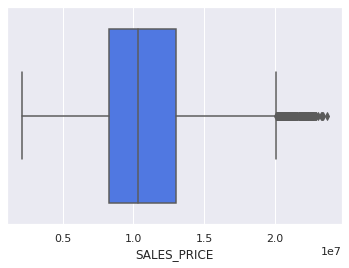

In [762]:
sns.boxplot(dataset["SALES_PRICE"])

**CHECKING UNIQUE ELEMENTS IN CATEGORICAL COLUMNS**

In [763]:
dataset.columns

Index(['AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'SALES_PRICE', 'AGE'],
      dtype='object')

In [764]:
print(dataset["AREA"].unique())
print(dataset["SALE_COND"].unique())
print(dataset["PARK_FACIL"].unique())
print(dataset["BUILDTYPE"].unique())
print(dataset["UTILITY_AVAIL"].unique())
print(dataset["STREET"].unique())
print(dataset["MZZONE"].unique())

['Karapakkam' 'Anna Nagar' 'Adyar' 'Velachery' 'Chrompet' 'KK Nagar'
 'TNagar' 'T Nagar' 'Chrompt' 'Chrmpet' 'Karapakam' 'Ana Nagar' 'Chormpet'
 'Adyr' 'Velchery' 'Ann Nagar' 'KKNagar']
['AbNormal' 'Family' 'Partial' 'AdjLand' 'Normal Sale' 'Ab Normal'
 'Partiall' 'Adj Land' 'PartiaLl']
['Yes' 'No' 'Noo']
['Commercial' 'Others' 'Other' 'House' 'Comercial']
['AllPub' 'ELO' 'NoSewr ' 'NoSeWa' 'All Pub']
['Paved' 'Gravel' 'No Access' 'Pavd' 'NoAccess']
['A' 'RH' 'RL' 'I' 'C' 'RM']


**CORRECTING SPELLING MISTAKE**

In [765]:
dataset['AREA'].replace(['Karapakam'],'Karapakkam', inplace=True )
dataset['AREA'].replace(['Ana Nagar','Ann Nagar'],'Anna Nagar', inplace=True )
dataset['AREA'].replace(['Adyr'],'Adyar', inplace=True )
dataset['AREA'].replace(['Velchery'],'Velachery', inplace=True )
dataset['AREA'].replace(['Chrompt','Chrmpet','Chormpet'],'Chrompet', inplace=True )
dataset['AREA'].replace(['KKNagar'],'KK Nagar', inplace=True )
dataset['AREA'].replace(['TNagar','T Nagar'],'T Nagar', inplace=True )

In [766]:
dataset['SALE_COND'].replace(['Ab Normal'],'AbNormal', inplace=True )
dataset['SALE_COND'].replace(['Partiall','PartiaLl'],'Partial', inplace=True )
dataset['SALE_COND'].replace(['Adj Land'],'AdjLand', inplace=True )

In [767]:
dataset['PARK_FACIL'].replace(['Noo'],'No', inplace=True )

In [768]:
dataset['BUILDTYPE'].replace(['Other'],'Others', inplace=True )
dataset['BUILDTYPE'].replace(['Comercial'],'Commercial', inplace=True )

In [769]:
dataset['UTILITY_AVAIL'].replace(['All Pub'],'AllPub', inplace=True )
dataset['UTILITY_AVAIL'].replace(['NoSeWa','NoSewr '],'NoSewr', inplace=True )


In [770]:
dataset['STREET'].replace(['Pavd'],'Paved', inplace=True )
dataset['STREET'].replace(['NoAccess'],'No Access', inplace=True )

In [771]:
print(dataset["AREA"].unique())
print(dataset["SALE_COND"].unique())
print(dataset["PARK_FACIL"].unique())
print(dataset["BUILDTYPE"].unique())
print(dataset["UTILITY_AVAIL"].unique())
print(dataset["STREET"].unique())
print(dataset["MZZONE"].unique())

['Karapakkam' 'Anna Nagar' 'Adyar' 'Velachery' 'Chrompet' 'KK Nagar'
 'T Nagar']
['AbNormal' 'Family' 'Partial' 'AdjLand' 'Normal Sale']
['Yes' 'No']
['Commercial' 'Others' 'House']
['AllPub' 'ELO' 'NoSewr']
['Paved' 'Gravel' 'No Access']
['A' 'RH' 'RL' 'I' 'C' 'RM']


In [772]:
dataset.columns

Index(['AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'SALES_PRICE', 'AGE'],
      dtype='object')

**EXPLORATORY DATA ANALYSIS**

**EDA FOR CATEGORICAL COLUMN**

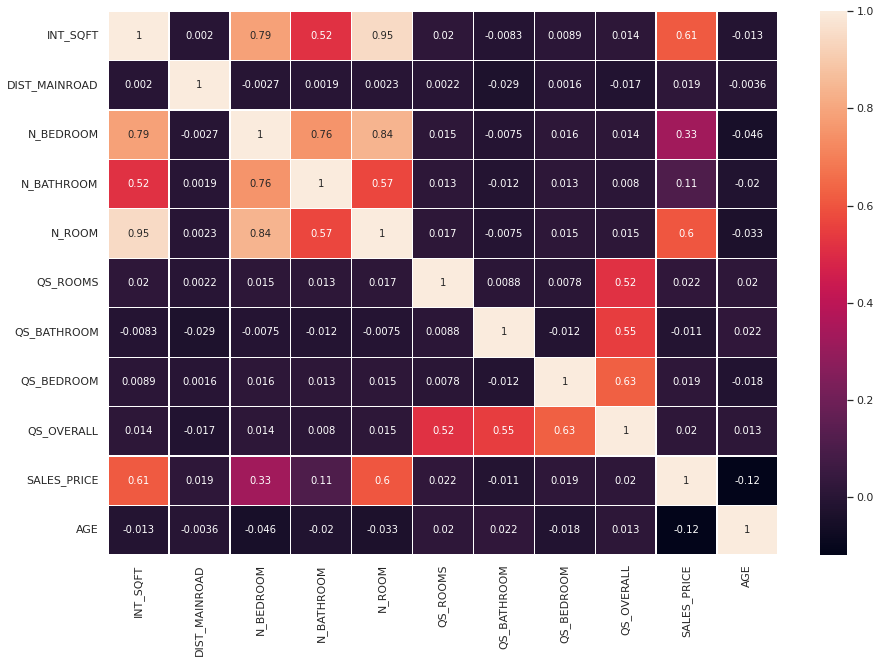

In [773]:
plt.figure(figsize=(15,10))
sns.heatmap(dataset.corr(), annot=True, linewidth= 0.2)

**CHECKING RELATIONSHIP IN BETWEEN THE AREA FEATURE AND SALES_PRICE TARGET COLUMN**

Text(0.5, 1.0, 'AREA wise House/Building counts')

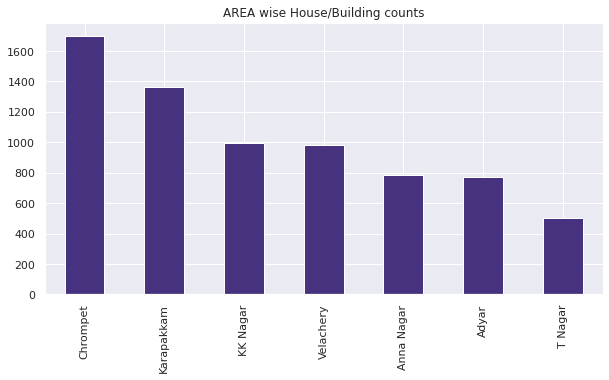

In [774]:
plt.figure(figsize=(10,5))
sns.set_theme(style="darkgrid",palette="viridis")
dataset['AREA'].value_counts().plot(kind='bar');
plt.title('AREA wise House/Building counts')

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

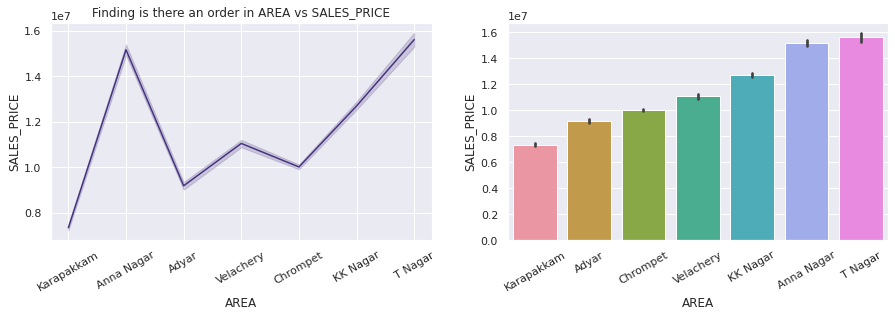

In [775]:
#Lets plot the relation between AREA and SALESPRICE
plt.figure(figsize=(15,4))
plt.subplot(121)
sns.lineplot(x=dataset['AREA'],y=dataset['SALES_PRICE'])
plt.xticks(rotation=30)
plt.title('Finding is there an order in AREA vs SALES_PRICE')
plt.subplot(122)
area_order = dataset.groupby('AREA')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['AREA']
sns.barplot(x= "AREA", y= "SALES_PRICE", data=dataset, order=area_order)
plt.xticks(rotation=30)

* There is a Linear Relationship in between AREA and SALES_PRICE.
* Here we can use Label encoding.  




**CHECKING RELATIONSHIP IN BETWEEN THE SALE_COND FEATURE AND SALES_PRICE TARGET COLUMN**

Text(0.5, 1.0, 'NO. OF HOUSES/BUILDINGS (SALE_COND WISE)')

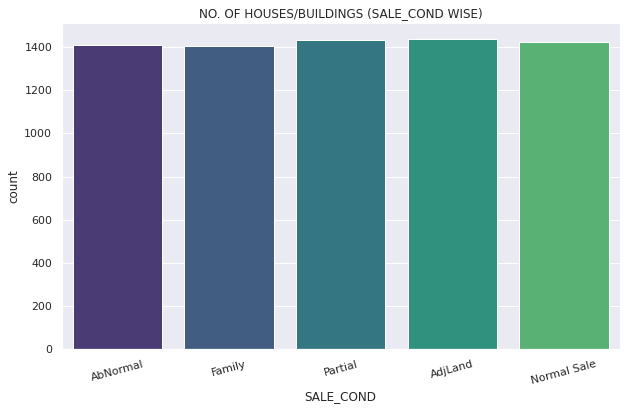

In [776]:
#SALE_COND distribution
plt.figure(figsize=(10,6)) 
sns.set_theme(style="darkgrid",palette="viridis")
sns.countplot(x='SALE_COND',data=dataset)
plt.xticks(rotation=15)
plt.title('NO. OF HOUSES/BUILDINGS (SALE_COND WISE)')

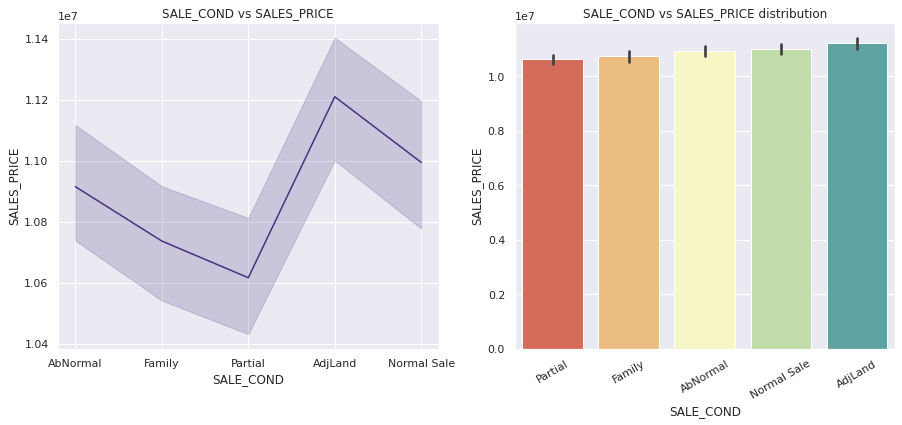

In [777]:
#SALE_COND VS SALES_PRICE
plt.figure(figsize=(15,6))
plt.subplot(121)
sns.lineplot(x=dataset['SALE_COND'],y=dataset['SALES_PRICE'])
plt.title('SALE_COND vs SALES_PRICE')
plt.subplot(122)
sns.barplot(x='SALE_COND',y='SALES_PRICE',data=dataset,palette='Spectral',order=dataset[['SALE_COND','SALES_PRICE']].groupby('SALE_COND').mean().sort_values('SALES_PRICE').reset_index().SALE_COND)
plt.xticks(rotation=30)
plt.title('SALE_COND vs SALES_PRICE distribution')
plt.show()


In SALE_COND column, all categories are uniformally distributed.So, we drop this feature.

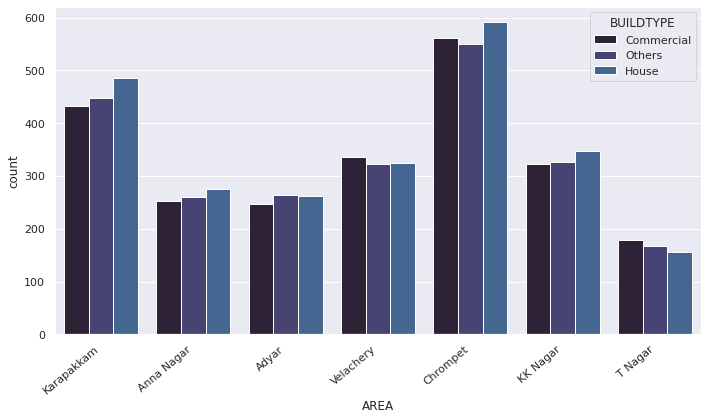

In [778]:
#BUILDTYPE VS AREA
plt.figure(figsize=(10,6))
sns.set_theme(style="darkgrid",palette="mako")
ax=sns.countplot(x="AREA", hue="BUILDTYPE", data=dataset)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

Most of the buildings are in Chrompet followed by Karapakkam and KK nagar.

**CHECKING RELATIONSHIP IN BETWEEN THE PARK_FACIL FEATURE AND SALES_PRICE TARGET COLUMN**

In [779]:
dataset.PARK_FACIL.value_counts()

Yes    3587
No     3522
Name: PARK_FACIL, dtype: int64

Text(0.5, 1.0, 'NO. OF HOUSES/BUILDINGS (PARK_FACIL wise)')

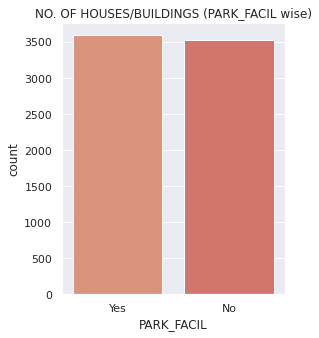

In [780]:
#PARK_FACIL distribution
plt.figure(figsize=(4,5)) 
sns.set_theme(style="darkgrid",palette="flare")
sns.countplot(x='PARK_FACIL',data=dataset)
plt.title('NO. OF HOUSES/BUILDINGS (PARK_FACIL wise)')


Text(0.5, 1.0, 'MEAN SALES_PRICE (PARK_FACIL WISE)')

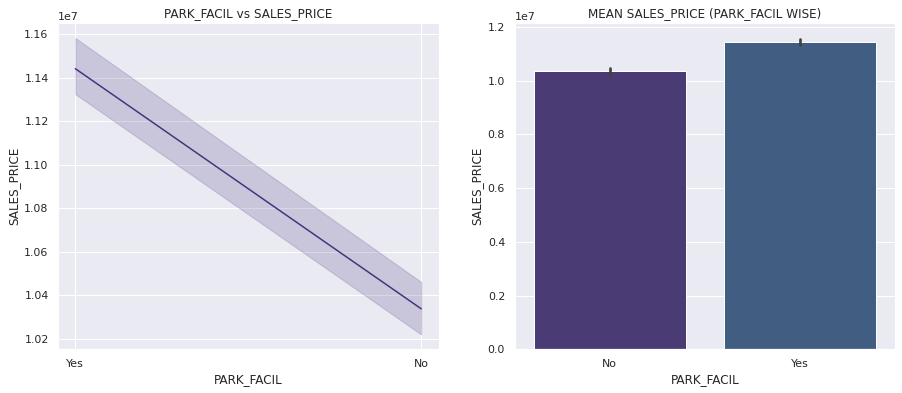

In [781]:
#PARK_FACIL vs SALES_PRICE
sns.set_theme(style="darkgrid",palette="viridis")
plt.figure(figsize=(15,6))
plt.subplot(121)
sns.lineplot(x='PARK_FACIL',y='SALES_PRICE',data=dataset)
plt.title('PARK_FACIL vs SALES_PRICE')
plt.subplot(122)
sns.barplot(x='PARK_FACIL',y='SALES_PRICE',data=dataset,order=dataset.groupby('PARK_FACIL')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['PARK_FACIL'])
plt.title('MEAN SALES_PRICE (PARK_FACIL WISE)')

* There is a Linear Relationship in 
between PARK_FACIL and SALES_PRICE.

* Here we can use Label encoding.



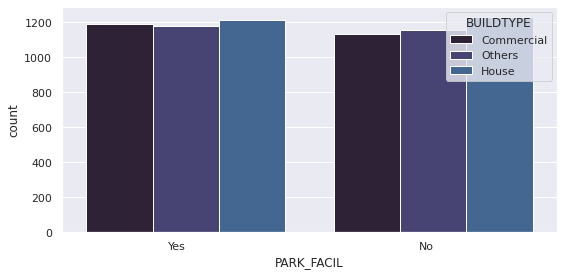

In [782]:
#BUILDTYPE VS PARK_FACIL
plt.figure(figsize=(8,4))
sns.set_theme(style="darkgrid",palette="mako")
ax=sns.countplot(x="PARK_FACIL", hue="BUILDTYPE", data=dataset)
ax.set_xticklabels(ax.get_xticklabels(),ha="right")
plt.tight_layout()
plt.show()

We can see comparitively most houses are with parking facilities and without parking available.

The houses with parking facility is more than house without parking facilities.

**CHECKING RELATIONSHIP IN BETWEEN THE BUILDTYPE FEATURE AND SALES_PRICE TARGET COLUMN**

Text(0.5, 1.0, 'NO. OF HOUSES/BUILDINGS (BUILDTYPE wise)')

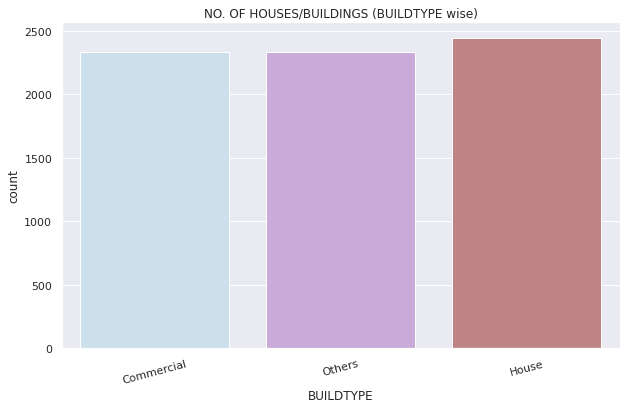

In [783]:
#BUILDTYPE distribution
plt.figure(figsize=(10,6)) 
sns.set_theme(style="darkgrid",palette="cubehelix_r")
sns.countplot(x='BUILDTYPE',data=dataset)
plt.xticks(rotation=15)
plt.title('NO. OF HOUSES/BUILDINGS (BUILDTYPE wise)')

Text(0.5, 1.0, 'MEAN SALES_PRICE (BUILDTYPE WISE)')

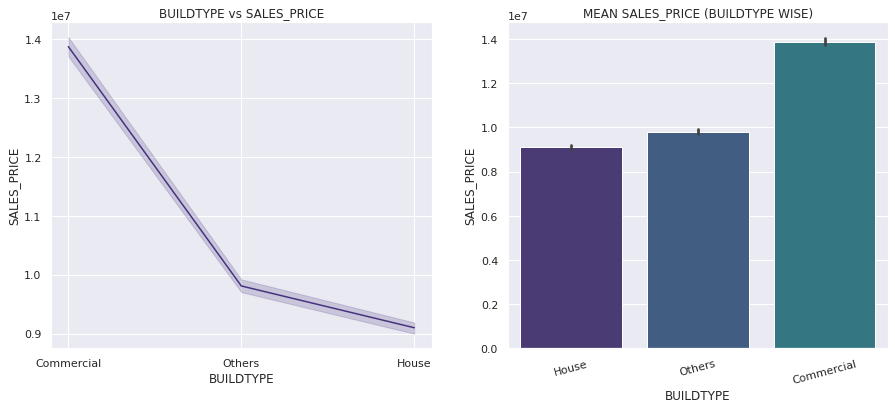

In [784]:
#BUILDTYPE vs SALES_PRICE distribution
sns.set_theme(style="darkgrid",palette="viridis")
plt.figure(figsize=(15,6))
plt.subplot(121)
sns.lineplot(x='BUILDTYPE',y='SALES_PRICE',data=dataset)
plt.title('BUILDTYPE vs SALES_PRICE')
plt.subplot(122)
sns.barplot(x='BUILDTYPE',y='SALES_PRICE',data=dataset,order=dataset.groupby('BUILDTYPE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['BUILDTYPE'])
plt.xticks(rotation=15)
plt.title('MEAN SALES_PRICE (BUILDTYPE WISE)')

* There is no Linear Relationship in between BUILDTYPE and SALES_PRICE.
* Here we can use OneHot encoding.



**CHECKING RELATIONSHIP IN BETWEEN THE UTILITY_AVAIL FEATURE AND SALES_PRICE TARGET COLUMN.**

In [785]:
dataset.UTILITY_AVAIL.value_counts()

NoSewr    3700
AllPub    1887
ELO       1522
Name: UTILITY_AVAIL, dtype: int64

Text(0.5, 1.0, 'NO. OF HOUSES/BUILDINGS (UTILITY_AVAIL wise)')

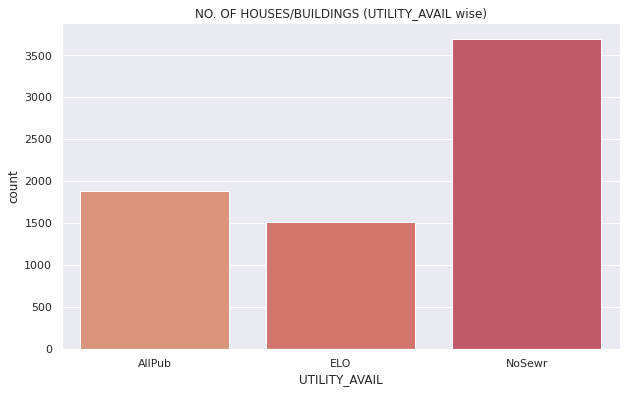

In [786]:
#UTILITY AVAIL distribution
plt.figure(figsize=(10,6)) 
sns.set_theme(style="darkgrid",palette="flare")
sns.countplot(x='UTILITY_AVAIL',data=dataset)
plt.title('NO. OF HOUSES/BUILDINGS (UTILITY_AVAIL wise)')

Text(0.5, 1.0, 'MEAN SALES_PRICE (UTILITY_AVAIL WISE)')

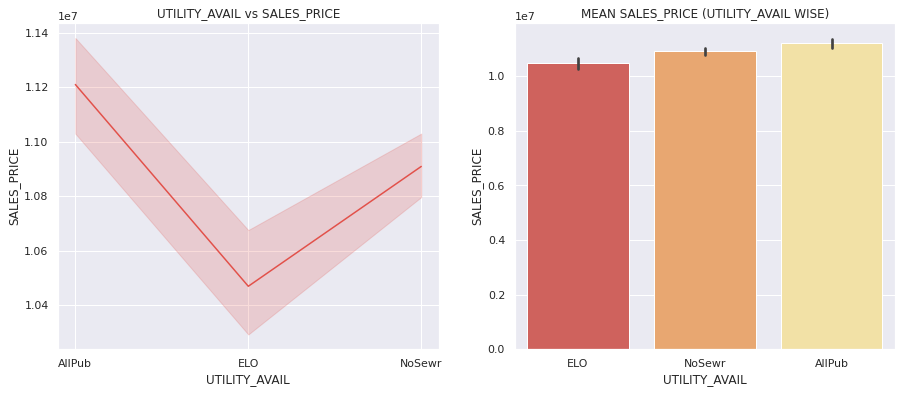

In [787]:
#UTILITY AVAIL vs SALESPRICE
sns.set_theme(style="darkgrid",palette="Spectral")
plt.figure(figsize=(15,6))
plt.subplot(121)
sns.lineplot(x=dataset['UTILITY_AVAIL'],y=dataset['SALES_PRICE'])
plt.title('UTILITY_AVAIL vs SALES_PRICE')
plt.subplot(122)
sns.barplot(x='UTILITY_AVAIL',y='SALES_PRICE',data=dataset,order=dataset.groupby('UTILITY_AVAIL')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['UTILITY_AVAIL'])
plt.title('MEAN SALES_PRICE (UTILITY_AVAIL WISE)')

* There is a Linear Relationship in between UTILITY_AVAIL and SALES_PRICE.
* Here we can use Label encoding.



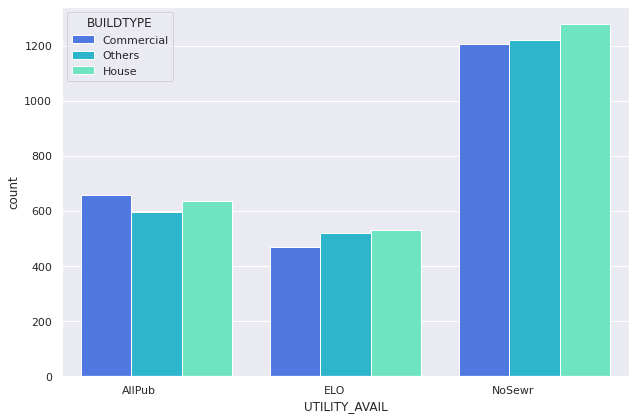

In [788]:
#UTILITY AVAIL vs BUILDTYPE
plt.figure(figsize=(9,6))
sns.set_theme(style="darkgrid",palette="rainbow")
ax=sns.countplot(x="UTILITY_AVAIL", hue="BUILDTYPE", data=dataset)
ax.set_xticklabels(ax.get_xticklabels(), ha="right")
plt.tight_layout()
plt.show()

Most of the houses are with no sewer availability

**CHECKING RELATIONSHIP IN BETWEEN THE STREET FEATURE AND SALES_PRICE TARGET COLUMN**

In [789]:
dataset.STREET.value_counts()

Paved        2572
Gravel       2520
No Access    2017
Name: STREET, dtype: int64

Text(0.5, 1.0, 'NO. OF HOUSES/BUILDINGS (STREET wise)')

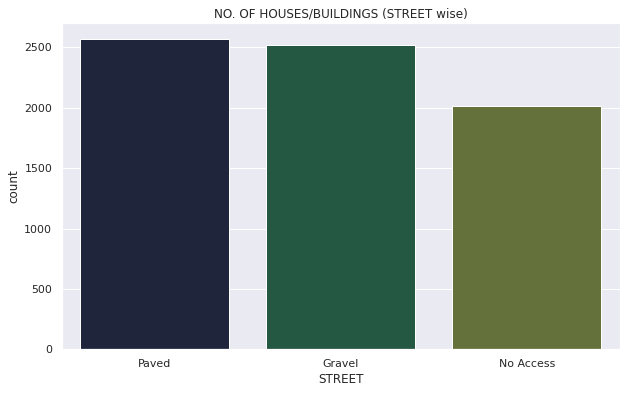

In [790]:
#STREET distribution
plt.figure(figsize=(10,6)) 
sns.set_theme(style="darkgrid",palette="cubehelix")
sns.countplot(x='STREET',data=dataset)
plt.title('NO. OF HOUSES/BUILDINGS (STREET wise)')

Text(0.5, 1.0, 'MEAN SALES_PRICE (STREET wise)')

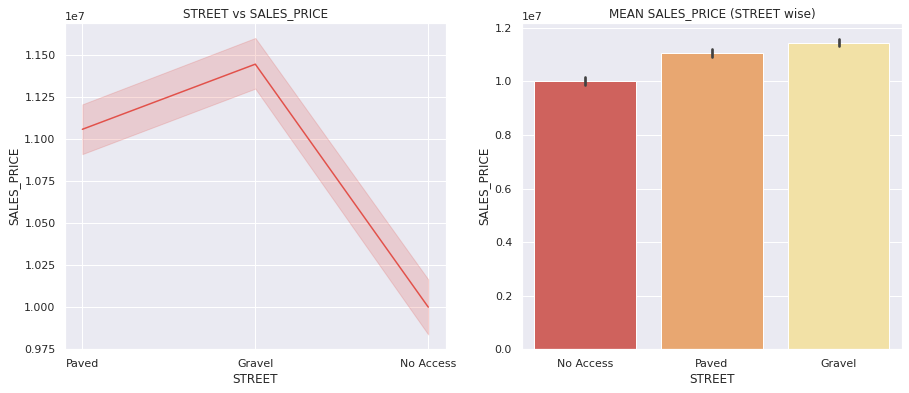

In [791]:
#STREET vs SALES_PRICE distribution
sns.set_theme(style="darkgrid",palette="Spectral")
plt.figure(figsize=(15,6))
plt.subplot(121)
sns.lineplot(x=dataset['STREET'],y=dataset['SALES_PRICE'])
plt.title('STREET vs SALES_PRICE')
plt.subplot(122)
sns.barplot(x='STREET',y='SALES_PRICE',data=dataset,order=dataset.groupby('STREET')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['STREET'])
plt.title('MEAN SALES_PRICE (STREET wise)')

* There is a Linear Relationship in between STREET and SALES_PRICE.
* Here we can use Label encoding.



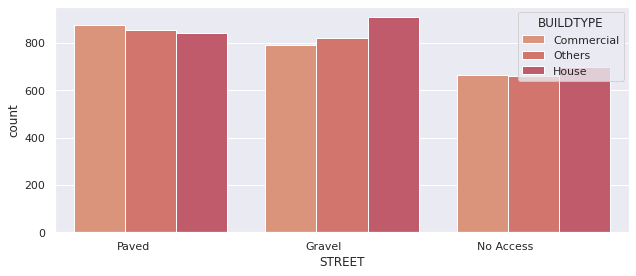

In [792]:
#STREET vs BUIILDTYPE
plt.figure(figsize=(9,4))
sns.set_theme(style="darkgrid",palette="flare")
ax=sns.countplot(x="STREET", hue="BUILDTYPE", data=dataset)
ax.set_xticklabels(ax.get_xticklabels(), ha="right")
plt.tight_layout()
plt.show()

Most of the houses are Gravel followed by Paved and No access.

Most of the Commercial buildings are made of paved streets

Text(0.5, 1.0, 'SALES_PRICE VS STREET (BuildType wise)')

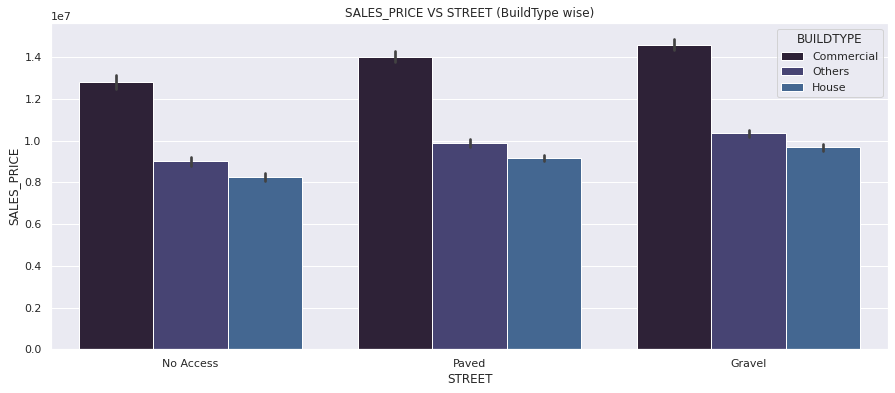

In [793]:
#STREET VS SALESPRICE VS BUILDTYPE
sns.set_theme(style="darkgrid",palette="mako")
plt.figure(figsize=(15,6))
sns.barplot(x='STREET',y='SALES_PRICE',data=dataset,hue='BUILDTYPE',order=dataset.groupby('STREET')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['STREET'])
plt.title('SALES_PRICE VS STREET (BuildType wise)')

We can see most of the Commercial buildings are made of "Paved" street but still the price for Gravel is high comparatively.

For all BUILDTYPEs the salesprice is high for "Gravel" street followed by "Paved" and "No Access".

Sales price would be high if there is Gravel street. So those who are selling their property it would be an advantage to get high sales price.

**CHECKING RELATIONSHIP IN BETWEEN THE MZZONE FEATURE AND SALES_PRICE TARGET COLUMN**

In [794]:
dataset.MZZONE.value_counts()

RL    1858
RH    1822
RM    1817
C      550
A      537
I      525
Name: MZZONE, dtype: int64

Text(0.5, 1.0, 'NO. OF BUILDINGS (MZZONE wise)')

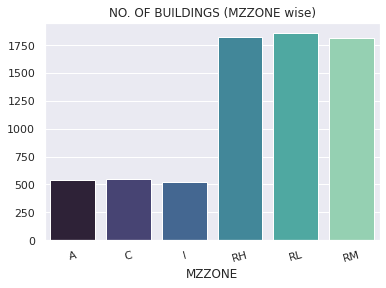

In [795]:
#MZZONE distribution
A=dataset['BUILDTYPE'].groupby(dataset['MZZONE']).count()
sns.barplot(x=A.index,y=A.values,data=dataset)
plt.xticks(rotation=15)
plt.title('NO. OF BUILDINGS (MZZONE wise)')

Text(0.5, 1.0, 'MEAN SALES_PRICE (MZZONE wise)')

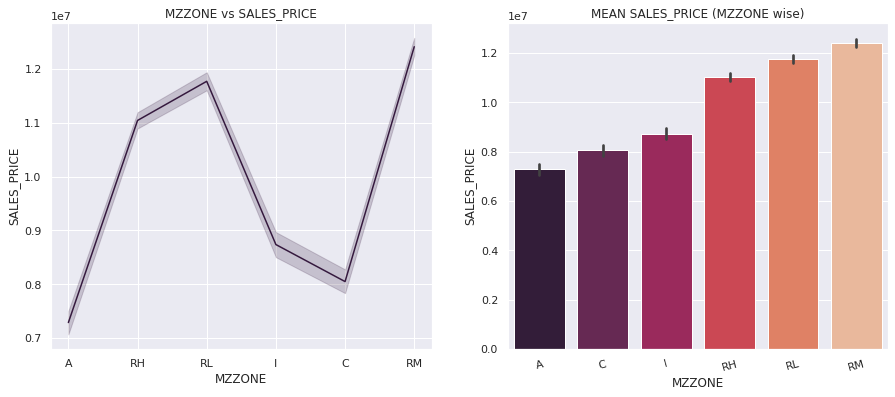

In [796]:
#MZZONE vs SALES_PRICE distribution

sns.set_theme(style="darkgrid",palette="rocket")
plt.figure(figsize=(15,6))
plt.subplot(121)
sns.lineplot(x=dataset['MZZONE'],y=dataset['SALES_PRICE'])
plt.title('MZZONE vs SALES_PRICE')
plt.subplot(122)
sns.barplot(x='MZZONE',y='SALES_PRICE',data=dataset,order=dataset.groupby('MZZONE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['MZZONE'])
plt.xticks(rotation=15)
plt.title('MEAN SALES_PRICE (MZZONE wise)')

* There is a Piecewise Linear Relationship in between MZZONE and SALES_PRICE.   
* Here we can use Label encoding.



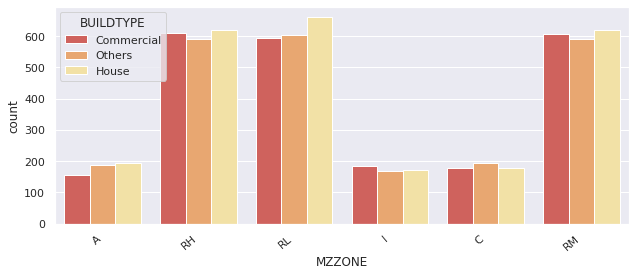

In [797]:
#MZONE VS BUILDTYPE
plt.figure(figsize=(9,4))
sns.set_theme(style="darkgrid",palette="Spectral")
ax=sns.countplot(x="MZZONE", hue="BUILDTYPE", data=dataset)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

More houses are in RL zone followed by RM and RH.

Least houses are available in I and C zones.

Text(0.5, 1.0, 'MEAN SALES_PRICE vs MZZONE(BuildType wise)')

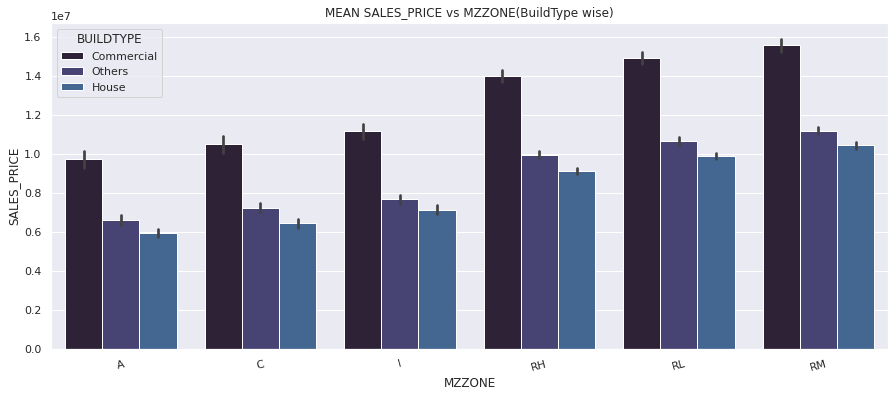

In [798]:
#MZONE VS BUILDTYPE vs SALESPRICE
sns.set_theme(style="darkgrid",palette="mako")
plt.figure(figsize=(15,6))
sns.barplot(x='MZZONE',y='SALES_PRICE',data=dataset,hue='BUILDTYPE',order=dataset.groupby('MZZONE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['MZZONE'])
plt.xticks(rotation=15)
plt.title('MEAN SALES_PRICE vs MZZONE(BuildType wise)')

Even though more houses are in RL,the house price is high at RM zone followed by RL and RH zones. -Least Houses are available at "I" zone but the price is a bit high when compare wit "A" and "C" zones.

**CHECKING LINEAR RELATIONSHIP IN BETWEEN INT_SQFT FEATURE AND SALES_PRICE TARGET COLUMN.**

<Figure size 720x432 with 0 Axes>

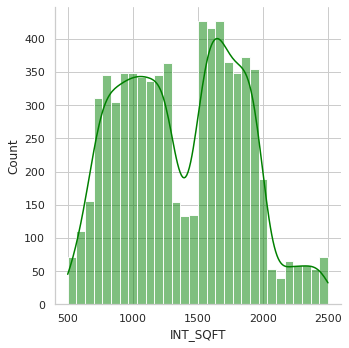

In [799]:
#INT_SQFT distribution
plt.figure(figsize=(10,6))
sns.set_style('whitegrid')
sns.displot(dataset['INT_SQFT'], kde = True, color ='Green', bins = 30)

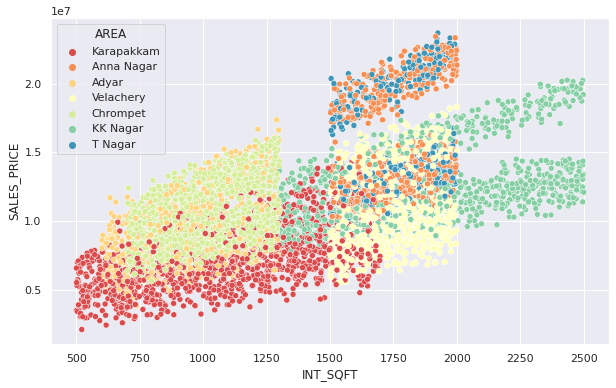

In [800]:
#Sales price vs INT_SQFT for each AREA
plt.figure(figsize=(10,6))
sns.set_theme(style="darkgrid",palette="Spectral")
sns.scatterplot(x=dataset['INT_SQFT'],y=dataset.SALES_PRICE,hue=dataset.AREA,palette='Spectral')


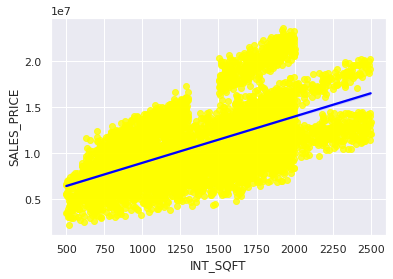

In [801]:
sns.regplot(x='INT_SQFT', y='SALES_PRICE', data=dataset, scatter_kws={'color':'yellow'}, line_kws={'color':'blue'})

* There is a strong Linear Realationship betweem INT_SQFT and SALES_PRICE.
* Here we can use this column for further process.



**CHECKING LINEAR RELATIONSHIP IN BETWEEN DIST_MAINROAD FEATURE AND SALES_PRICE TARGET COLUMN.**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


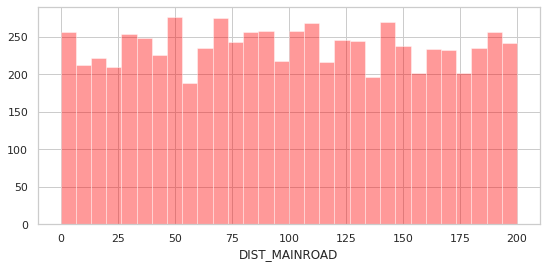

In [802]:
sns.set_style('whitegrid')
plt.figure(figsize=(9,4))
sns.distplot(dataset['DIST_MAINROAD'], kde = False, color ='red', bins = 30)

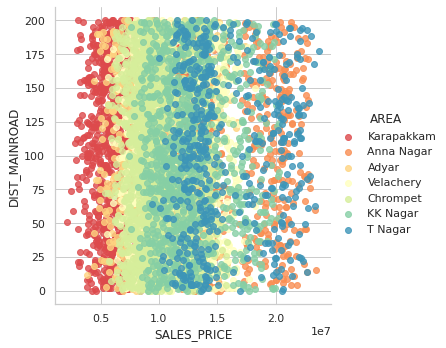

In [803]:
#DIST_MAINROAD VS SALESPRICE for each AREA
sns.lmplot(x='SALES_PRICE', y='DIST_MAINROAD', hue='AREA',palette='Spectral',
           data=dataset.loc[dataset['AREA'].isin(["Chrompet","Karapakkam","KK Nagar","Velachery","Anna Nagar","Adyar","T Nagar" ])],
           fit_reg=False)

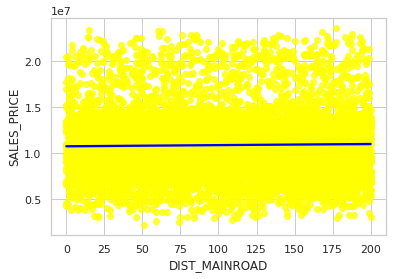

In [804]:
sns.regplot(x='DIST_MAINROAD', y='SALES_PRICE', data=dataset, scatter_kws={'color':'yellow'}, line_kws={'color':'blue'})

In [805]:
dataset=dataset.drop(['DIST_MAINROAD'],axis=1)

* There is a no Linear Realationship betweem DIST_MAINROAD and SALES_PRICE.
* Here better drop this feature.

**N_BEDROOM**

Text(0.5, 1.0, 'N_BEDROOM')

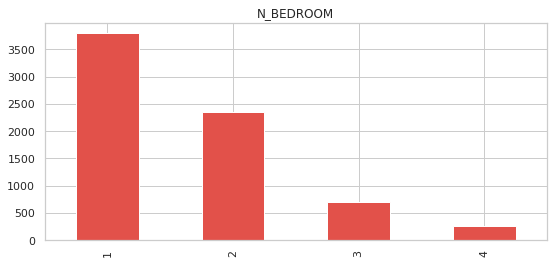

In [806]:
plt.figure(figsize=(9,4))
dataset['N_BEDROOM'].value_counts().plot(kind='bar');
plt.title('N_BEDROOM')

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

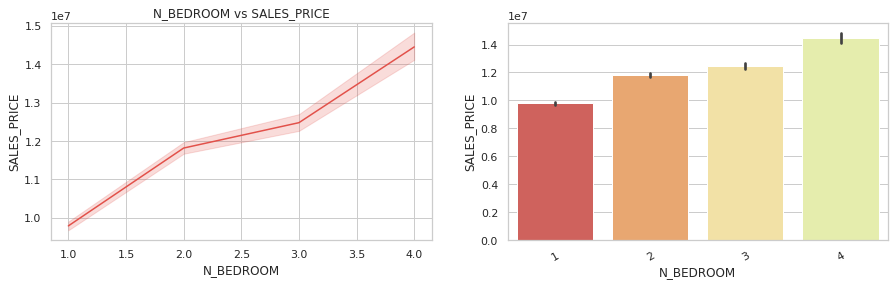

In [807]:
#N_BEDROOM VS SALES_PRICE
plt.figure(figsize=(15,4))
plt.subplot(121)
sns.lineplot(x=dataset['N_BEDROOM'],y=dataset['SALES_PRICE'])
plt.title('N_BEDROOM vs SALES_PRICE')
plt.subplot(122)
area_order = dataset.groupby('N_BEDROOM')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['N_BEDROOM']
sns.barplot(x= "N_BEDROOM", y= "SALES_PRICE", data=dataset, order=area_order)
plt.xticks(rotation=30)

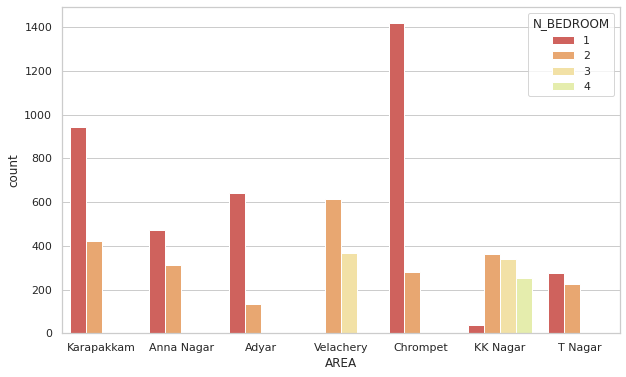

In [808]:
#BEDROOM VS AREA
plt.figure(figsize=(10,6))
sns.countplot(x="AREA", hue="N_BEDROOM", data=dataset)

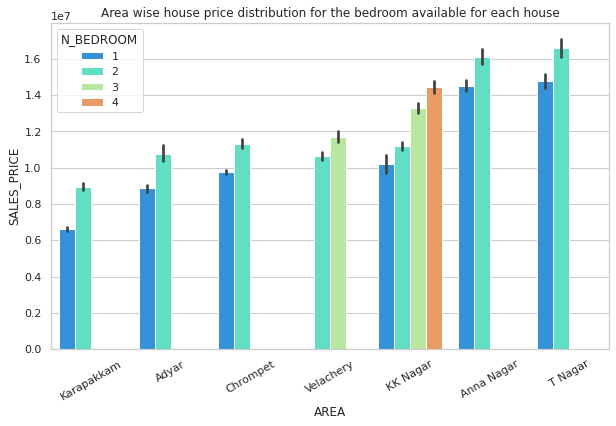

In [809]:
#SALES_PRICE of houses with N_BEDROOM in each AREA
plt.figure(figsize=(10,6))

sns.barplot(x='AREA',y='SALES_PRICE',data=dataset,palette='rainbow',hue='N_BEDROOM',order=dataset[['AREA','SALES_PRICE']].groupby('AREA').mean().sort_values('SALES_PRICE').reset_index().AREA)
plt.xticks(rotation=30)
plt.title('Area wise house price distribution for the bedroom available for each house')
plt.show()

There is a linear relationship between BEDROOM and the target variable SALES_PRICE.

As the number of rooms increases the sales price also increases

**N_BATHROOM**

Text(0.5, 1.0, 'N_BATHROOM')

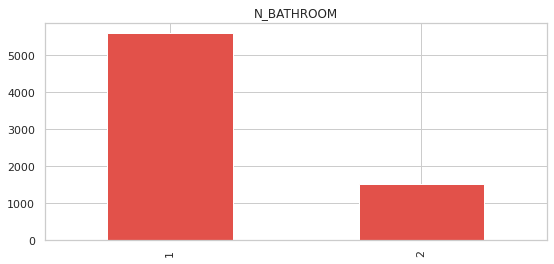

In [810]:
plt.figure(figsize=(9,4))
dataset['N_BATHROOM'].value_counts().plot(kind='bar');
plt.title('N_BATHROOM')

,N_BATHROOM,N_BEDROOM
N_BATHROOM,1.000000,0.755207
N_BEDROOM,0.755207,1.000000


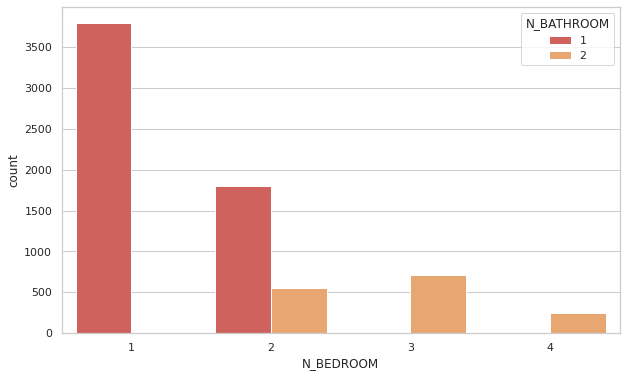

In [811]:
#N_BEDROOM VS N_BATHROOM
plt.figure(figsize=(10,6))
sns.countplot(x="N_BEDROOM", hue="N_BATHROOM", data=dataset)
dataset[['N_BATHROOM','N_BEDROOM']].corr()

There is a strong correlation between bedroom and bathroom.

We can see 1 bedroom buildings has only 1 bathroom. But for bulidings which consist of 3 and 4 bedrooms has only 2 bathroom. It may be commercial,houses or any other bulid type.


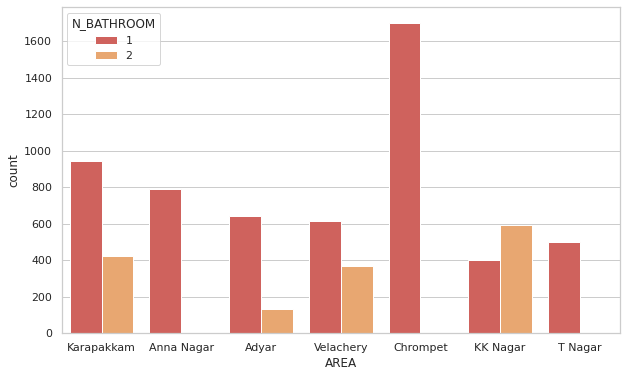

In [812]:
#BATHROOM VS AREA
plt.figure(figsize=(10,6))
sns.countplot(x="AREA", hue="N_BATHROOM", data=dataset)

Chrompet, T Nagar and Anna Nagar has no building which consist of two bathrooms.

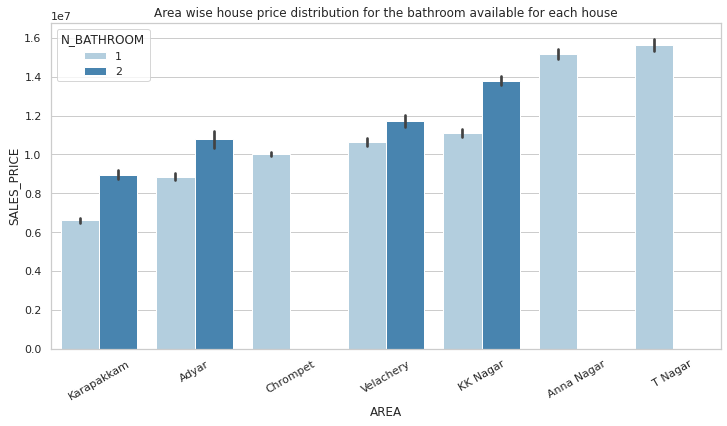

In [813]:
#N_BATHROOM VS AREA vs salesprice

plt.figure(figsize=(12,6))

sns.barplot(x='AREA',y='SALES_PRICE',data=dataset,palette='Blues',hue='N_BATHROOM',order=dataset[['AREA','SALES_PRICE']].groupby('AREA').mean().sort_values('SALES_PRICE').reset_index().AREA)
plt.xticks(rotation=30)
plt.title('Area wise house price distribution for the bathroom available for each house')
plt.show()

We can see some of the buildings/houses in some areas don't have two bathroom facilities but still the price is high for T Nagar and Anna Nagar followed by KK Nagar.

**N_ROOM**

Text(0.5, 1.0, 'N_ROOM')

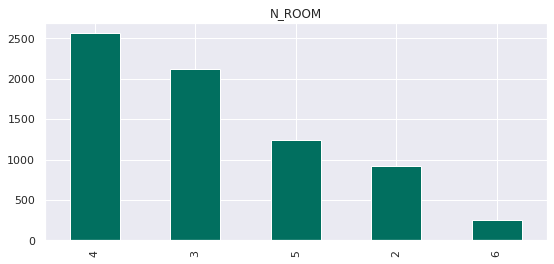

In [814]:
#N_ROOM distribution
sns.set_theme(style="darkgrid",palette="PuBuGn_r")
plt.figure(figsize=(9,4))
dataset['N_ROOM'].value_counts().plot(kind='bar');
plt.title('N_ROOM')

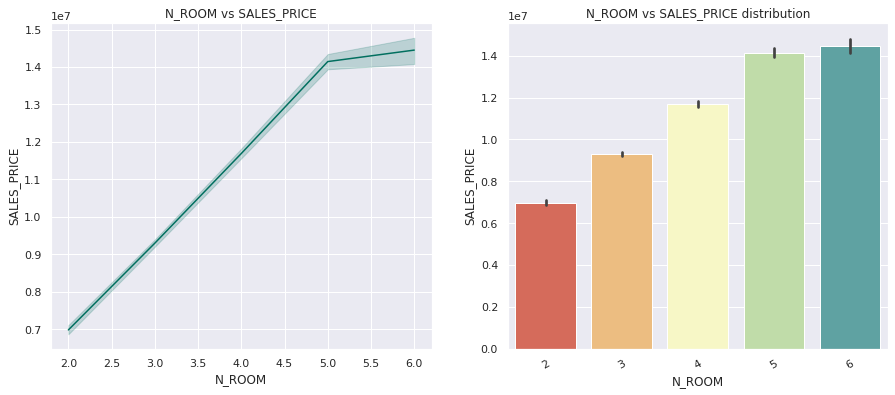

,N_ROOM,SALES_PRICE
N_ROOM,1.00000,0.60276
SALES_PRICE,0.60276,1.00000


In [815]:
#N_ROOM VS SALES PRICE
plt.figure(figsize=(15,6))
plt.subplot(121)
sns.lineplot(x=dataset['N_ROOM'],y=dataset['SALES_PRICE'])
plt.title('N_ROOM vs SALES_PRICE')
plt.subplot(122)
sns.barplot(x='N_ROOM',y='SALES_PRICE',data=dataset,palette='Spectral',order=dataset[['N_ROOM','SALES_PRICE']].groupby('N_ROOM').mean().sort_values('SALES_PRICE').reset_index().N_ROOM)
plt.xticks(rotation=30)
plt.title('N_ROOM vs SALES_PRICE distribution')
plt.show()
dataset[['N_ROOM','SALES_PRICE']].corr()

We can see a linear relation between the sales price and the number of rooms available in each building or houses.

As there is an increase in number of rooms there is an increase in sales price.

There is a positive correlation of 0.60 between N_ROOM and SALES_PRICE.

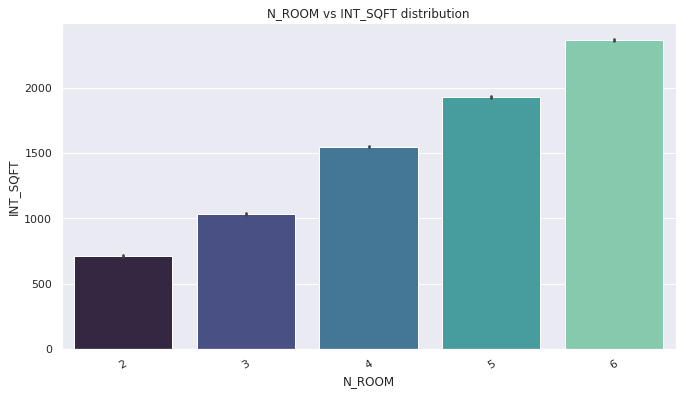

,N_ROOM,INT_SQFT
N_ROOM,1.000000,0.951279
INT_SQFT,0.951279,1.000000


In [816]:
#N_ROOM VS SQRFT
plt.figure(figsize=(11,6))
sns.barplot(x='N_ROOM',y='INT_SQFT',data=dataset,palette='mako',order=dataset[['N_ROOM','INT_SQFT']].groupby('N_ROOM').mean().sort_values('INT_SQFT').reset_index().N_ROOM)
plt.xticks(rotation=30)
plt.title('N_ROOM vs INT_SQFT distribution')
plt.show()
dataset[['N_ROOM','INT_SQFT']].corr()

-There is high positive correlation of 0.95 between N_ROOM and INT_SQFT.

As we know as the room numbers increases there will be an increase in sqft.

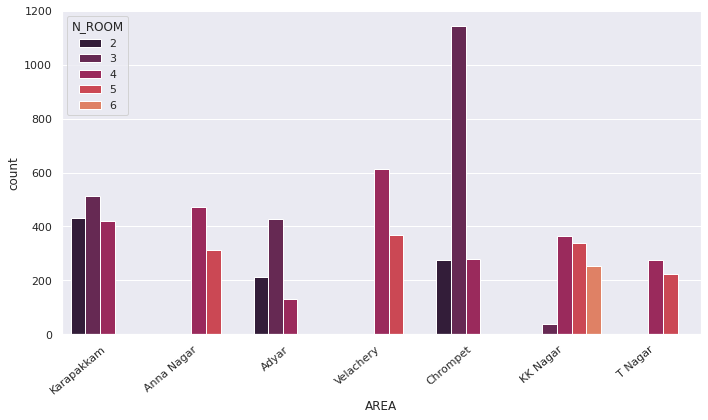

In [817]:
#N_ROOM VS AREA
plt.figure(figsize=(10,6)) 
sns.set_theme(style="darkgrid",palette="rocket")
ax=sns.countplot(x="AREA", hue="N_ROOM", data=dataset)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

Chrompet has more than 1000 buildings which 3 rooms.

KK Nagar is the only place where buildings are available with 5 and 6 number of rooms.

Only Adyar,Karapakkam and Chrompet has buildings with 2 number of rooms.

**CHECKING LINEAR RELATIONSHIP IN BETWEEN QS_ROOMS FEATURE AND SALES_PRICE TARGET COLUMN.**

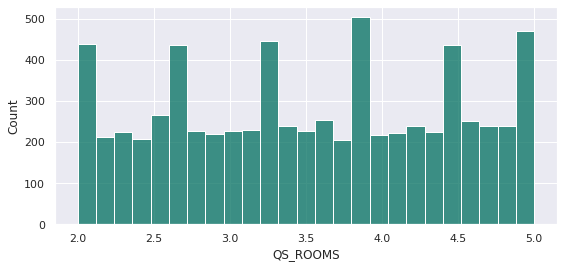

In [818]:
sns.set_theme(style="darkgrid",palette="PuBuGn_r")
plt.figure(figsize=(9,4))
sns.histplot(dataset['QS_ROOMS'],bins = 25)

,QS_ROOMS,SALES_PRICE
QS_ROOMS,1.000000,0.021967
SALES_PRICE,0.021967,1.000000


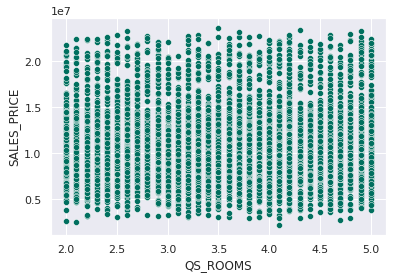

In [819]:
#QS_ROOMS vs SALES_PRICE
sns.scatterplot(x = "QS_ROOMS", y = "SALES_PRICE", data = dataset, palette = "Spectral")
dataset[['QS_ROOMS','SALES_PRICE']].corr()

* There is a no Linear Realationship betweem QS_ROOMS and SALES_PRICE.
* Here better drop this feature.

**CHECKING LINEAR RELATIONSHIP IN BETWEEN QS_BATHROOM FEATURE AND SALES_PRICE TARGET COLUMN.**

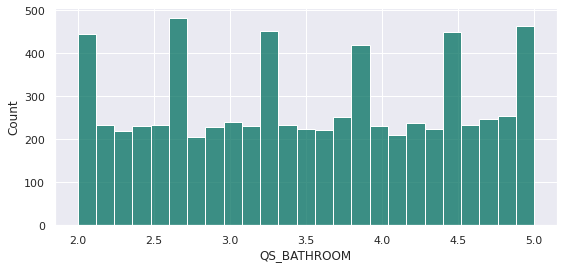

In [820]:
sns.set_theme(style="darkgrid",palette="PuBuGn_r")
plt.figure(figsize=(9,4))
sns.histplot(dataset['QS_BATHROOM'],bins = 25)

,QS_BATHROOM,SALES_PRICE
QS_BATHROOM,1.000000,-0.011377
SALES_PRICE,-0.011377,1.000000


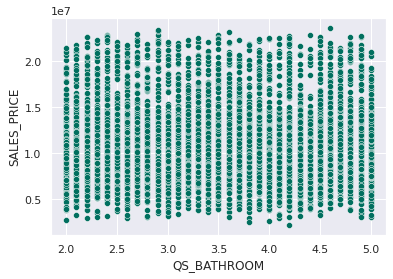

In [821]:
#QS_BATHROOM vs SALES_PRICE
sns.scatterplot(x = "QS_BATHROOM", y = "SALES_PRICE", data = dataset, palette = "rainbow")
dataset[['QS_BATHROOM','SALES_PRICE']].corr()

* There is a no Linear Realationship betweem QS_BATHROOM and SALES_PRICE.
* Here better drop this feature.

**CHECKING LINEAR RELATIONSHIP IN BETWEEN QS_BEDROOM FEATURE AND SALES_PRICE TARGET COLUMN**

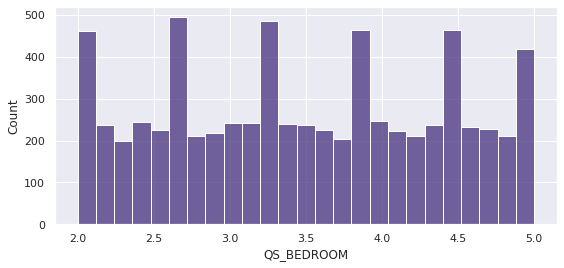

In [822]:
sns.set_theme(style="darkgrid",palette="viridis")
plt.figure(figsize=(9,4))
sns.histplot(dataset['QS_BEDROOM'],bins = 25)

,QS_BEDROOM,SALES_PRICE
QS_BEDROOM,1.000000,0.018804
SALES_PRICE,0.018804,1.000000


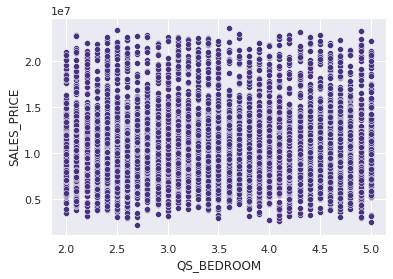

In [823]:
#QS_BEDROOM vs SALES_PRICE
sns.scatterplot(x = "QS_BEDROOM", y = "SALES_PRICE", data = dataset, palette = "Spectral")
dataset[['QS_BEDROOM','SALES_PRICE']].corr()

* There is a no Linear Realationship betweem QS_BEDROOM and SALES_PRICE.
* Here better drop this feature.

**CHECKING LINEAR RELATIONSHIP IN BETWEEN QS_OVERALL FEATURE AND SALES_PRICE TARGET COLUMN**

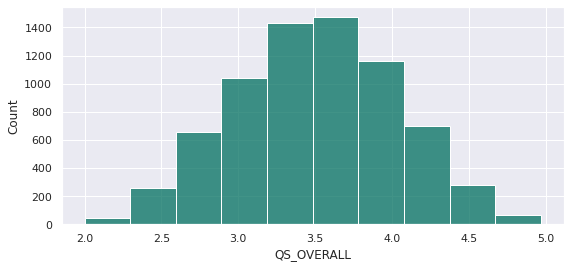

In [824]:
#QS_OVERALL distirbution
sns.set_theme(style="darkgrid",palette="PuBuGn_r")
plt.figure(figsize=(9,4))
sns.histplot(dataset['QS_OVERALL'],bins = 10)

,QS_OVERALL,SALES_PRICE
QS_OVERALL,1.000000,0.020485
SALES_PRICE,0.020485,1.000000


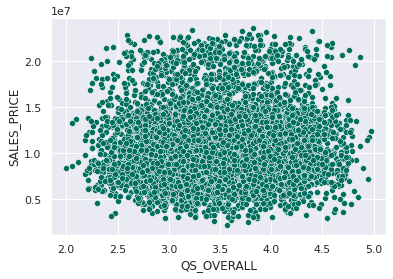

In [825]:
#QS_OVERALL vs SALES_PRICE
sns.scatterplot(x = "QS_OVERALL", y = "SALES_PRICE", data = dataset, palette = "Spectral")
dataset[['QS_OVERALL','SALES_PRICE']].corr()

CHECKING LINEAR RELATIONSHIP IN BETWEEN AGE FEATURE AND SALES_PRICE TARGET COLUMN

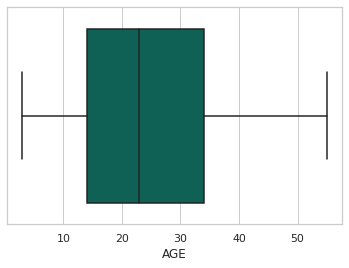

In [826]:
#Checking for outliers in HOUSE_AGE
sns.set_style("whitegrid")
  
sns.boxplot(x = 'AGE', data = dataset)

<Figure size 648x288 with 0 Axes>

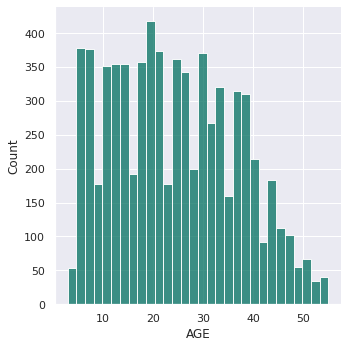

In [827]:
#HOUSE_AGE distribution
sns.set_theme(style="darkgrid",palette="PuBuGn_r")
plt.figure(figsize=(9,4))
sns.displot(dataset['AGE'],bins = 30)

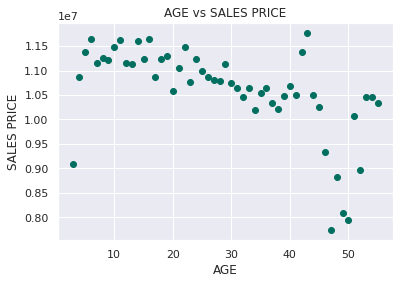

,AGE,SALES_PRICE
AGE,1.000000,-0.118842
SALES_PRICE,-0.118842,1.000000


In [828]:
#HOUSE_AGE vs SALES_PRICE
dataset.groupby('AGE')['SALES_PRICE'].mean().plot(style='o')
plt.title('AGE vs SALES PRICE')
plt.xlabel('AGE')
plt.ylabel('SALES PRICE')
plt.show()
dataset[['AGE','SALES_PRICE']].corr()

* There is a negative Realationship betweem INT_SQFT and SALES_PRICE.
* Here we can use this column for further process.



**Finding out min,max,avg sales price per BUILDTYPE and AREA**

In [829]:
#BUILDTYPE -Buildtype Commercial
buildtype_Com = dataset['BUILDTYPE']=='Commercial'
commercial=dataset.loc[buildtype_Com]
commercial.head()

,AREA,INT_SQFT,DATE_SALE,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,AGE
0,Karapakkam,1004,2011-04-05,1,1,3,AbNormal,Yes,1967-05-15,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000,44
1,Anna Nagar,1986,2006-12-19,2,1,5,AbNormal,No,1995-12-22,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770,11
2,Adyar,909,2012-04-02,1,1,3,AbNormal,Yes,1992-09-02,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200,20
5,Chrompet,1220,2014-11-09,2,1,4,Partial,No,2009-12-09,Commercial,NoSewr,No Access,RH,4.5,2.6,3.1,3.320,12394750,5
7,Velachery,1847,2006-03-13,3,2,5,Family,No,1996-03-15,Commercial,AllPub,Gravel,RM,2.4,4.5,2.1,3.260,16800250,10


In [830]:
#Finding mean,min,max of sales price for commercial building
min = commercial['SALES_PRICE'].min()
mean= commercial['SALES_PRICE'].mean()
max = commercial['SALES_PRICE'].max()

In [831]:
index=['Minimun_Sales_Price','Average_Sales_Price','Maximum_Sales_Price']
comm = pd.DataFrame([min,mean,max],columns=['Commercial'],index=index)
comm

,Commercial
Minimun_Sales_Price,3.120000e+06
Average_Sales_Price,1.386984e+07
Maximum_Sales_Price,2.366734e+07


In [832]:
#BUILDTYPE-HOUSE
buildtype_House = dataset['BUILDTYPE']=='House'
house=dataset.loc[buildtype_House]
house.head()

,AREA,INT_SQFT,DATE_SALE,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,AGE
16,Karapakkam,1639,2009-04-11,2,2,4,Normal Sale,Yes,1991-09-11,House,ELO,Gravel,I,2.3,3.2,4.8,3.570,8656000,18
25,T Nagar,1685,2014-07-19,1,1,4,Family,No,1980-07-27,House,NoSewr,Gravel,RM,2.8,4.4,4.0,3.740,12601080,34
28,Adyar,730,2011-08-19,1,1,2,AdjLand,Yes,1972-08-28,House,ELO,Gravel,RL,2.7,4.6,4.9,4.180,8848285,39
29,T Nagar,1806,2013-08-18,2,1,5,Family,No,1978-08-27,House,NoSewr,Paved,RH,4.1,5.0,3.0,3.830,11338200,35
30,Anna Nagar,1981,2009-01-04,2,1,5,AdjLand,No,2000-03-04,House,ELO,No Access,RL,2.0,3.1,3.2,2.755,12872430,9


In [833]:
#Finding mean,min,max of sales price for House building
min = house['SALES_PRICE'].min()
mean= house['SALES_PRICE'].mean()
max = house['SALES_PRICE'].max()

In [834]:
house = pd.DataFrame([min,mean,max],columns=['House'],index=index)
house

,House
Minimun_Sales_Price,2.640250e+06
Average_Sales_Price,9.098847e+06
Maximum_Sales_Price,1.588093e+07


In [835]:
#BUILDTYPE-Others
buildtype_others = dataset['BUILDTYPE']=='Others'
Others=dataset.loc[buildtype_others]
min = Others['SALES_PRICE'].min()
mean= Others['SALES_PRICE'].mean()
max = Others['SALES_PRICE'].max()
others = pd.DataFrame([min,mean,max],columns=['Others'],index=index)
others

,Others
Minimun_Sales_Price,2.156875e+06
Average_Sales_Price,9.807998e+06
Maximum_Sales_Price,1.685901e+07


In [836]:
Build_type_new = pd.concat([comm,house,others],axis=1)
Build_type_new = pd.DataFrame(Build_type_new.T)
Build_type_new["Build_type"]=["Commercial","House","Others"]
Build_type_new

,Minimun_Sales_Price,Average_Sales_Price,Maximum_Sales_Price,Build_type
Commercial,3120000.0,1.386984e+07,23667340.0,Commercial
House,2640250.0,9.098847e+06,15880930.0,House
Others,2156875.0,9.807998e+06,16859010.0,Others


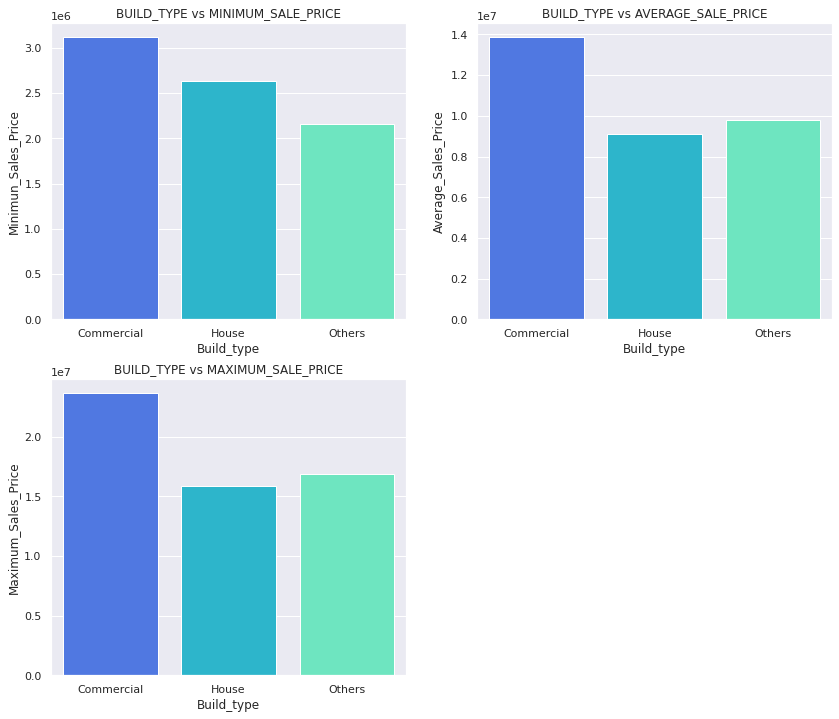

In [837]:
plt.figure(figsize=(14,12))
sns.set_theme(style="darkgrid",palette="rainbow")
plt.subplot(221)
sns.barplot(x="Build_type",y="Minimun_Sales_Price",data=Build_type_new)
plt.title('BUILD_TYPE vs MINIMUM_SALE_PRICE')
plt.subplot(222)
sns.barplot(x="Build_type",y="Average_Sales_Price",data=Build_type_new)
plt.title('BUILD_TYPE vs AVERAGE_SALE_PRICE')
plt.subplot(223)
sns.barplot(x="Build_type",y="Maximum_Sales_Price",data=Build_type_new)
plt.title('BUILD_TYPE vs MAXIMUM_SALE_PRICE')
plt.show()

In all graphs, the Minimum,Average and Maximum Price of commercial building is higher than "House" and "Others" building type.

Minimum price of "House" price is higher than "Others" building type, but Maximum and Avg Price lower than "Others" building type.

Minimum price of "Others" price is lower than "House" building type, but Maximum and Avg Price higher than "House" building type.

**MIN,MAX and AVG Sales price of buildingtype on each area**

In [838]:
mean=pd.DataFrame(dataset[['AREA', 'BUILDTYPE','SALES_PRICE']].groupby(['BUILDTYPE','AREA'])['SALES_PRICE'].mean())
max=pd.DataFrame(dataset[['AREA', 'BUILDTYPE','SALES_PRICE']].groupby(['BUILDTYPE','AREA'])['SALES_PRICE'].max())
min=pd.DataFrame(dataset[['AREA', 'BUILDTYPE','SALES_PRICE']].groupby(['BUILDTYPE','AREA'])['SALES_PRICE'].min())

In [839]:
min

SALES_PRICE
BUILDTYPE  AREA                   
Commercial Adyar           6036800
           Anna Nagar     15754040
           Chrompet        8071050
           KK Nagar       11286720
           Karapakkam      3120000
           T Nagar        16300260
           Velachery      10391900
House      Adyar           3869180
           Anna Nagar      9593040
           Chrompet        5340900
           KK Nagar        7410200
           Karapakkam      2640250
           T Nagar         9433610
           Velachery       5574400
Others     Adyar           4456285
           Anna Nagar     10245090
           Chrompet        5925790
           KK Nagar        7826780
           Karapakkam      2156875
           T Nagar        10573780
           Velachery       6074780

In [840]:
new_df = pd.concat([min['SALES_PRICE'].rename('Minimum'),mean['SALES_PRICE'].rename('Average'),max['SALES_PRICE'].rename('Maximum')],axis=1)
new_df

Minimum       Average   Maximum
BUILDTYPE  AREA                                        
Commercial Adyar        6036800  1.151977e+07  17360470
           Anna Nagar  15754040  1.994195e+07  23407860
           Chrompet     8071050  1.238855e+07  16026600
           KK Nagar    11286720  1.596759e+07  20246360
           Karapakkam   3120000  9.166997e+06  14486250
           T Nagar     16300260  2.011892e+07  23667340
           Velachery   10391900  1.426175e+07  18298710
House      Adyar        3869180  7.973683e+06  11409485
           Anna Nagar   9593040  1.240600e+07  15237150
           Chrompet     5340900  8.553965e+06  11845200
           KK Nagar     7410200  1.066675e+07  14276060
           Karapakkam   2640250  6.266440e+06   9966750
           T Nagar      9433610  1.266454e+07  15880930
           Velachery    5574400  9.036630e+06  12247960
Others     Adyar        4456285  8.209260e+06  11818860
           Anna Nagar  10245090  1.347352e+07  16859010
           Chrompet     5925790  9.154363e+06  12851040
           KK Nagar     7826780  1.163470e+07  14521700
           Karapakkam   2156875  6.737757e+06  11117625
           T Nagar     10573780  1.357577e+07  16766120
           Velachery    6074780  9.726395e+06  12669880

In [841]:
new_df['BUILDTYPE']=['Commercial','Commercial','Commercial','Commercial','Commercial','Commercial','Commercial',
                      'House','House','House','House','House','House','House',
                      'Others','Others','Others','Others','Others','Others','Others']  

new_df['AREA']=["Adyar","Anna Nagar","Chrompet","KK Nagar","Karapakam","T Nagar","Velachery"]*3                      
new_df

Minimum       Average   Maximum   BUILDTYPE  \
BUILDTYPE  AREA                                                       
Commercial Adyar        6036800  1.151977e+07  17360470  Commercial   
           Anna Nagar  15754040  1.994195e+07  23407860  Commercial   
           Chrompet     8071050  1.238855e+07  16026600  Commercial   
           KK Nagar    11286720  1.596759e+07  20246360  Commercial   
           Karapakkam   3120000  9.166997e+06  14486250  Commercial   
           T Nagar     16300260  2.011892e+07  23667340  Commercial   
           Velachery   10391900  1.426175e+07  18298710  Commercial   
House      Adyar        3869180  7.973683e+06  11409485       House   
           Anna Nagar   9593040  1.240600e+07  15237150       House   
           Chrompet     5340900  8.553965e+06  11845200       House   
           KK Nagar     7410200  1.066675e+07  14276060       House   
           Karapakkam   2640250  6.266440e+06   9966750       House   
           T Nagar      9433610  1.266454e+07  15880930       House   
           Velachery    5574400  9.036630e+06  12247960       House   
Others     Adyar        4456285  8.209260e+06  11818860      Others   
           Anna Nagar  10245090  1.347352e+07  16859010      Others   
           Chrompet     5925790  9.154363e+06  12851040      Others   
           KK Nagar     7826780  1.163470e+07  14521700      Others   
           Karapakkam   2156875  6.737757e+06  11117625      Others   
           T Nagar     10573780  1.357577e+07  16766120      Others   
           Velachery    6074780  9.726395e+06  12669880      Others   

                             AREA  
BUILDTYPE  AREA                    
Commercial Adyar            Adyar  
           Anna Nagar  Anna Nagar  
           Chrompet      Chrompet  
           KK Nagar      KK Nagar  
           Karapakkam   Karapakam  
           T Nagar        T Nagar  
           Velachery    Velachery  
House      Adyar            Adyar  
           Anna Nagar  Anna Nagar  
           Chrompet      Chrompet  
           KK Nagar      KK Nagar  
           Karapakkam   Karapakam  
           T Nagar        T Nagar  
           Velachery    Velachery  
Others     Adyar            Adyar  
           Anna Nagar  Anna Nagar  
           Chrompet      Chrompet  
           KK Nagar      KK Nagar  
           Karapakkam   Karapakam  
           T Nagar        T Nagar  
           Velachery    Velachery

**Minimum SALES PRICE for each AREA(BUILD TYPE wise)**

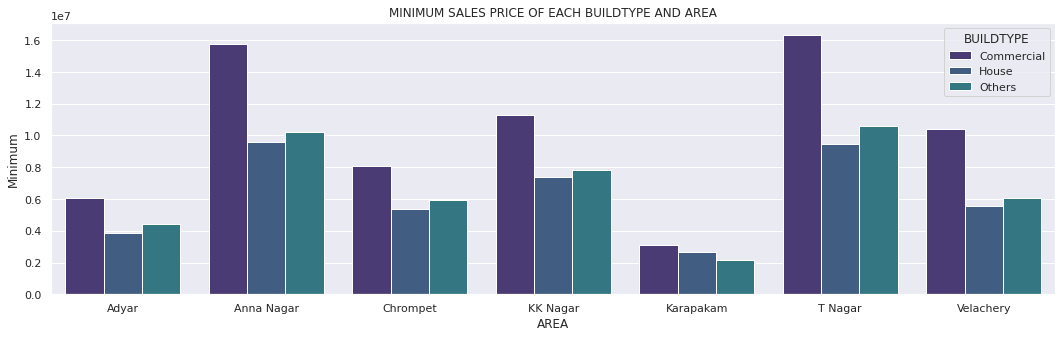

In [842]:
plt.figure(figsize=(18,5))
sns.set_theme(style="darkgrid",palette="viridis")
sns.barplot(x='AREA',y='Minimum',data=new_df,hue='BUILDTYPE')
plt.title('MINIMUM SALES PRICE OF EACH BUILDTYPE AND AREA')
plt.show()

* COMMERCIAL - Karapakkam area has the lowest price when compared with other area's. Followed with ("Adyar","Chrompet","Velachery","KK Nagar","Anna Nagar","T Nagar"). "T Nagar" is the first highest according to the "Sales_Price".

* HOUSE - Again Karapakam area has the lowest price when compared with other area's. Followed with ("Adyar","Chrompet","Velachery","KK Nagar","Anna Nagar","T Nagar"). Again "T Nagar" is the first highest according to the "Sales_Price".

* OTHERS - Again Karapakam area has the lowest price when compared with other area's. Followed with ("Adyar","Chrompet","Velachery","KK Nagar","Anna Nagar","T Nagar"). Again "T Nagar" is the first highest according to the "Sales_Price".



**Maximum SALES PRICE for each AREA(BUILD TYPE wise)**

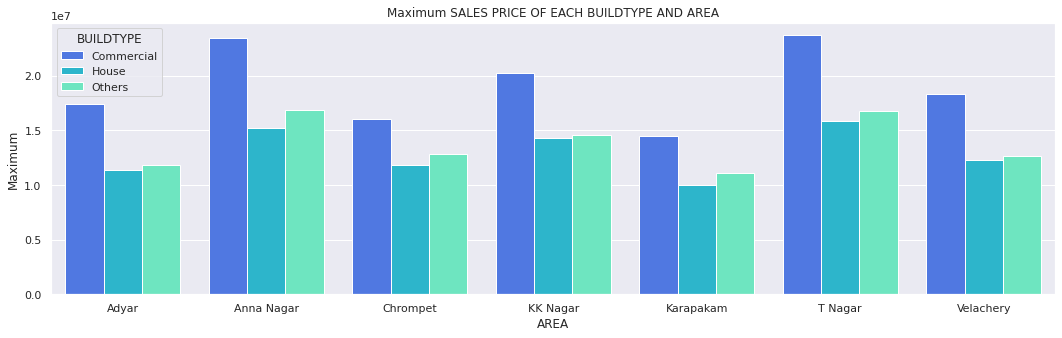

In [843]:
plt.figure(figsize=(18,5))
sns.set_theme(style="darkgrid",palette="rainbow")
sns.barplot(x='AREA',y='Maximum',data=new_df,hue='BUILDTYPE')
plt.title('Maximum SALES PRICE OF EACH BUILDTYPE AND AREA')
plt.show()

* COMMERCIAL - T Nagar area has the highest price when compared with other area's. Followed with (Anna Nagar,KK Nagar,Velachery, Adyar, Chrompet, Karapakkam)."Karapakkam" is the first lowest according to the "Sales_Price".

* HOUSE - T Nagar followed by Anna Nagar has the highest price when compared with other area's. . Karapakkam is the first lowest according to the "Sales_Price".

* OTHERS - T Nagar followed by Anna Nagar has the highest price when compared with other area's. . Karapakkam is the first lowest according to the "Sales_Price".

In [844]:
dataset.drop(['QS_OVERALL','QS_BEDROOM','QS_BATHROOM','QS_ROOMS'],axis=1, inplace=True)

**ENCODING- Label and One hot**

We are using label encoding for all the Categorical features except the feature called "BUILDTYPE" for that we use One Hot Encoding.

In [845]:
pd.DataFrame(dataset.dtypes.value_counts()).T

,object,int64,datetime64[ns]
0,7,6,2


There are 7 features that we need to encode.

In [846]:
dataset.AREA = dataset.AREA.map({'Karapakkam':0, 'Anna Nagar':5, 'Adyar':1, 'Velachery':3, 'Chrompet':2 ,'KK Nagar':4,'T Nagar':6})
dataset.PARK_FACIL = dataset.PARK_FACIL.map({'Yes':1,'No':0})
dataset.BUILDTYPE = dataset.BUILDTYPE.map({'Commercial':2, 'Others':1, 'House':0})
dataset.UTILITY_AVAIL = dataset.UTILITY_AVAIL.map({'AllPub':2, 'ELO':1, 'NoSewr':3})
dataset.STREET = dataset.STREET.map({'Paved':2, 'Gravel':3, 'No Access':1})
dataset.MZZONE=dataset.MZZONE.map({'A':1,'C':2,'I':3,'RH':5,'RL':6,'RM':7})

In [847]:
dataset.STREET.unique()

array([2, 3, 1])

In [848]:
dataset.AREA.unique()

array([0, 5, 1, 3, 2, 4, 6])

In [849]:
dataset.head()

,AREA,INT_SQFT,DATE_SALE,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE,AGE
0,0,1004,2011-04-05,1,1,3,AbNormal,1,1967-05-15,2,2,2,1,7600000,44
1,5,1986,2006-12-19,2,1,5,AbNormal,0,1995-12-22,2,2,3,5,21717770,11
2,1,909,2012-04-02,1,1,3,AbNormal,1,1992-09-02,2,1,3,6,13159200,20
3,3,1855,2010-03-13,3,2,5,Family,0,1988-03-18,1,3,2,3,9630290,22
4,0,1226,2009-05-10,1,1,3,AbNormal,1,1979-10-13,1,2,3,2,7406250,30


In [850]:
#BUILDTYPE one hot encoding
build_df=pd.get_dummies(dataset["BUILDTYPE"],prefix='BUIILDTYPE')
build_df

,BUIILDTYPE_0,BUIILDTYPE_1,BUIILDTYPE_2
0,0,0,1
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
7104,0,1,0
7105,0,1,0
7106,1,0,0
7107,0,0,1


In [851]:
new_data=pd.concat([dataset,build_df],axis=1)

In [852]:
new_data

,AREA,INT_SQFT,DATE_SALE,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE,AGE,BUIILDTYPE_0,BUIILDTYPE_1,BUIILDTYPE_2
0,0,1004,2011-04-05,1,1,3,AbNormal,1,1967-05-15,2,2,2,1,7600000,44,0,0,1
1,5,1986,2006-12-19,2,1,5,AbNormal,0,1995-12-22,2,2,3,5,21717770,11,0,0,1
2,1,909,2012-04-02,1,1,3,AbNormal,1,1992-09-02,2,1,3,6,13159200,20,0,0,1
3,3,1855,2010-03-13,3,2,5,Family,0,1988-03-18,1,3,2,3,9630290,22,0,1,0
4,0,1226,2009-05-10,1,1,3,AbNormal,1,1979-10-13,1,2,3,2,7406250,30,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,0,598,2011-03-01,1,1,2,AdjLand,0,1962-01-15,1,1,1,7,5353000,49,0,1,0
7105,3,1897,2004-08-04,3,2,5,Family,1,1995-11-04,1,3,1,5,10818480,9,0,1,0
7106,3,1614,2006-08-25,2,1,4,Normal Sale,0,1978-01-09,0,3,3,3,8351410,28,1,0,0
7107,0,787,2009-03-08,1,1,2,Partial,1,1977-11-08,2,1,2,6,8507000,32,0,0,1


**DATA PREPROCESSING**

TRAIN TEST SPLIT

FEATURE SCALING - Normalized and Standardized

FEATURE SELECTION - Correlation /Mutual Information

In [853]:
x=new_data.drop(labels=['SALES_PRICE','DATE_SALE','DATE_BUILD','SALE_COND'], axis=1)
x.shape

(7109, 14)

In [854]:
y=dataset[["SALES_PRICE"]].values
y.shape

(7109, 1)

In [855]:
x.dtypes

AREA             int64
INT_SQFT         int64
N_BEDROOM        int64
N_BATHROOM       int64
N_ROOM           int64
PARK_FACIL       int64
BUILDTYPE        int64
UTILITY_AVAIL    int64
STREET           int64
MZZONE           int64
AGE              int64
BUIILDTYPE_0     uint8
BUIILDTYPE_1     uint8
BUIILDTYPE_2     uint8
dtype: object

**Train/Test split**

In [856]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2, random_state=0)  
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((5687, 14), (5687, 1), (1422, 14), (1422, 1))

**Pearson Correlation between independent variables**

In [857]:
x_train.corr()

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,AGE,BUIILDTYPE_0,BUIILDTYPE_1,BUIILDTYPE_2
AREA,1.000000,0.688342,0.325071,-0.044393,0.648025,0.006537,0.015733,0.060163,0.075924,0.371248,-0.065517,-0.011163,-0.004967,0.016194
INT_SQFT,0.688342,1.000000,0.786003,0.511141,0.951130,-0.002001,0.009949,0.076931,0.092396,0.158236,-0.004198,-0.004720,-0.007884,0.012599
N_BEDROOM,0.325071,0.786003,1.000000,0.753304,0.839639,-0.017582,-0.005948,0.090570,0.115275,0.053698,-0.035351,0.008695,-0.007196,-0.001611
N_BATHROOM,-0.044393,0.511141,0.753304,1.000000,0.564101,-0.016749,-0.016956,0.055274,0.064951,-0.056373,-0.013632,0.021158,-0.013155,-0.008251
N_ROOM,0.648025,0.951130,0.839639,0.564101,1.000000,-0.007763,0.008202,0.070916,0.090418,0.176909,-0.024799,-0.003075,-0.008155,0.011210
PARK_FACIL,0.006537,-0.002001,-0.017582,-0.016749,-0.007763,1.000000,0.017269,-0.020442,-0.001443,-0.005468,-0.018257,-0.016644,0.003450,0.013349
BUILDTYPE,0.015733,0.009949,-0.005948,-0.016956,0.008202,0.017269,1.000000,0.009105,-0.020048,-0.004969,-0.027149,-0.869954,0.009499,0.867647
UTILITY_AVAIL,0.060163,0.076931,0.090570,0.055274,0.070916,-0.020442,0.009105,1.000000,0.049924,0.044609,-0.045425,0.001310,-0.018633,0.017207
STREET,0.075924,0.092396,0.115275,0.064951,0.090418,-0.001443,-0.020048,0.049924,1.000000,0.042579,-0.039370,0.016741,0.001229,-0.018100
MZZONE,0.371248,0.158236,0.053698,-0.056373,0.176909,-0.005468,-0.004969,0.044609,0.042579,1.000000,-0.129290,0.012337,-0.016297,0.003768


**SCALING**

In [858]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler() 
scaler.fit(x_train) 
x_train_scaled = scaler.transform(x_train) 
x_test_scaled = scaler.transform(x_test)

**Model Building**

In [859]:
def evaluation(y_test, y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r_squared = r2_score(y_test, y_pred)
    return mae, mse, rmse, r_squared

In [860]:
models = pd.DataFrame(columns=["Model","MAE","MSE","RMSE","R2 Score"])

**Linear Regression**

In [861]:
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)
y_pred = lin_reg.predict(x_test)

mae, mse, rmse, r_squared = evaluation(y_test, y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)

new_row = {"Model": "LinearRegression","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared}
models = models.append(new_row, ignore_index=True)

MAE: 788316.2391231019
MSE: 1078103019955.5642
RMSE: 1038317.3984652113
R2 Score: 0.920594307712769
------------------------------


**R2 SCORE OF LINEAR REGRESSION IS 0.92**

**K-Nearest Neighbour**

In [862]:
params = {'n_neighbors':[1,2,3,4,5,6,7,8,9,10,12,13,14,15,16,17,18,19,20,30,80]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(x_train,y_train)
model.best_params_

{'n_neighbors': 10}

In [863]:
mae, mse, rmse, r_squared = evaluation(y_test, y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)


new_row = {"Model": "KNN","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared}
models = models.append(new_row, ignore_index=True)

MAE: 788316.2391231019
MSE: 1078103019955.5642
RMSE: 1038317.3984652113
R2 Score: 0.920594307712769
------------------------------


**R2 SCORE OF K-NEAREST NEIGHBOUR IS 0.92**

**Decision Tree**

In [864]:
param_grid = {
    'max_depth':[1,2,3,4,5,6,7,8,9,10,20,40,60]}
reg = GridSearchCV(DecisionTreeRegressor(),param_grid=param_grid)

In [865]:
reg.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 40,
                                       60]})

In [866]:
reg.best_params_

{'max_depth': 20}

In [867]:
y_pred = reg.predict(x_test)

mae, mse, rmse, r_squared = evaluation(y_test, y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)


new_row = {"Model": "Decision Tree","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared}
models = models.append(new_row, ignore_index=True)

MAE: 448384.29793717765
MSE: 337119025328.1548
RMSE: 580619.51855596
R2 Score: 0.9751701190944795
------------------------------


**R2 SCORE OF DECISION TREE IS 0.97**

**RANDOM FOREST**

In [868]:
params = {'n_estimators': [100, 200, 300, 500]}
print(params)

{'n_estimators': [100, 200, 300, 500]}


In [869]:
rf = RandomForestRegressor()

In [870]:
model = GridSearchCV(rf, params, cv=5)
model.fit(x_train,y_train) 
model.best_params_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

{'n_estimators': 500}

In [871]:
mae, mse, rmse, r_squared = evaluation(y_test,y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)

new_row = {"Model": "RandomForestRegressor","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared}
models = models.append(new_row, ignore_index=True)

MAE: 448384.29793717765
MSE: 337119025328.1548
RMSE: 580619.51855596
R2 Score: 0.9751701190944795
------------------------------


**R2 SCORE OF RANDOM FOREST REGRESSOR IS 0.97**

**XG BOOST REGRESSOR**

In [872]:
xgb = XGBRegressor(n_estimators=1000, learning_rate=0.01,objective='reg:squarederror')
xgb.fit(x_train, y_train)
y_pred = xgb.predict(x_test)

mae, mse, rmse, r_squared = evaluation(y_test, y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
new_row = {"Model": "XGBRegressor","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared}
models = models.append(new_row, ignore_index=True)

MAE: 282379.76511954993
MSE: 130293934104.01837
RMSE: 360962.51066283655
R2 Score: 0.9904034402586287
------------------------------


**R2 SCORE OF XGBOOST REGRESSOR IS 0.99**

In [873]:
models.sort_values(by="RMSE")

,Model,MAE,MSE,RMSE,R2 Score
4,XGBRegressor,282379.765120,1.302939e+11,3.609625e+05,0.990403
2,Decision Tree,448384.297937,3.371190e+11,5.806195e+05,0.975170
3,RandomForestRegressor,448384.297937,3.371190e+11,5.806195e+05,0.975170
0,LinearRegression,788316.239123,1.078103e+12,1.038317e+06,0.920594
1,KNN,788316.239123,1.078103e+12,1.038317e+06,0.920594


**XGBoost Regressor is the best model followed by KNN,Decison Tree and Random Forest**

**Suggestions to Sellers and Buyers**

**Sellers** - If any sellers want to build any type of building in chennai. I would suggest them to build a "Commercial" building.

coming to the location wise I would suggest "T Nagar", as the first choice because the sales_price of "T Nagar" is higher than other Area. I would suggest the agent to build with the "Parking facility" and with "All_Utility".

Gravel type street fetches more money than Paved street. I will strongly suggest not to construct any type of building which has no access to the building.

**Buyers** - The average sales_price of "house" building is lesser than "Others" & "Commercial" type buildings. 

coming to the location wise I would suggest Buyers to buy in Karapakkam followed by Chrompet and Adyar, because the price is much lower than any other area and also it is near to the beach.